In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
# time [ms], omega
def readcsv(file):
    result = []
    with open(file, 'r') as f:
        for line in f:
            line = line[:-1].split(',')[:-1]
            if line[1] == '0' and line[3] != '': result.append([float(line[0]), float(line[3])])
    return result

def graph(data, draw=True, top_offset=2):
    x = [i[0] for i in data]
    y = [i[1] for i in data]
    if draw:
        plt.ylim(ymin=0, ymax=(max(y) + top_offset))
        plt.plot(x, y, 'ro')

    A = np.vstack([x, np.ones(len(x))]).T
    line, resid = np.linalg.lstsq(A, y)[:2] # fit line
    k, n = line[0], line[1]
    if draw:
        yfit = [k * xi + n for xi in x]
        plt.plot(x, yfit)
    return (line[0], line[1], resid / (len(x) * np.var(x)))

def accel_from_range(r):
    alpha = 0
    alpha_err = 0

    for i in r:
        d = readcsv('data/' + str(i) + '.csv')
        k, n, err = graph(d, draw=False)
        alpha += k
        if alpha_err < err[0]: alpha_err = err[0]

    k /= 3
    return (k, alpha_err)

def omega_from_range(r):
    omega = 0
    for i in r:
        a = readcsv('data/' + str(i) + '.csv')
        omega += sum([j[1] for j in a]) / len(a)
    return omega/len(r)

def ni(ran, mu):
    omega = omega_from_range(ran)
    k = 1.424e-3
    return (mu * 9.81 * (0.053/2))/(k*omega)

In [58]:
upor = accel_from_range(range(21, 24, 1))
print('upor:', upor[0], upor[1])

vztrajnostni = accel_from_range(range(18, 21, 1))
alpha_vztrajnostni = (vztrajnostni[0] - upor[0], max([vztrajnostni[1], upor[1]]))
print('alpha za vztrajnostni z vstetim uporom', alpha_vztrajnostni[0], alpha_vztrajnostni[1])

upor: -0.68288135188 0.0323195019458
alpha za vztrajnostni z vstetim uporom 0.91755788036 0.0323195019458


In [68]:
dva = ni(range(3, 8, 1), 0.002)
tri = ni(range(8, 13, 1), 0.003)
stiri = ni(range(13, 16, 1), 0.004)
print('ni za 2g:', dva)
print('ni za 3g:', tri)
print('ni za 4g:', stiri)
print(sum([dva, tri, stiri])/3)

ni za 2g: 0.20992388282643173
ni za 3g: 0.1953791695920703
ni za 4g: 0.1837806043954762
0.19636121893799274


(0.0015110130676314806, 1.7225898869708873, array([ 0.00025296]))

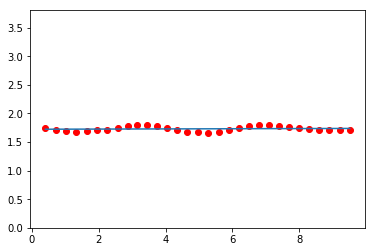

In [71]:
graph(readcsv('data/3.csv'))